In [218]:
import pandas as pd
from pandas_datareader import data
from datetime import date
import warnings
warnings.filterwarnings("ignore")

user_number = int(input("How many stocks: "))

stocks = []

for i in range(0, user_number):
    stocks.append(input('Enter the stocks: '))

stocks.append(input('Enter the benchmark: '))

print("Enter the Risk Free Rate: ")
rf=float((input('Risk Free Rate: ')))

print("Enter intended start date details: ")
startdate = (input('startdate (YYYY-MM-DD): '))

print("Enter intended enddate details: ")
enddate = (input('enddate (YYYY-MM-DD): '))
print('\n')

df = data.DataReader(stocks, 
                start=startdate, 
                end=enddate, 
                data_source='yahoo')
df_close=df['Adj Close']
df_close=df_close.pct_change()
df_close['Rf']=rf
print(df_close.head())
print('\n')

stock_df = df_close[df_close.columns[0:-2]]
portfolio_excess = stock_df.sum(axis=1) - rf #do i subtract rf from portfolio return?
                                             #do i use sum or mean?
mkt_df = df_close[df_close.columns[-2:]]
mkt_df=mkt_df.diff(axis=1)*-1.0
market_excess = mkt_df[mkt_df.columns[-1]]

model_df = pd.DataFrame(
    {'portfolio_excess': portfolio_excess,
     'market_excess': market_excess,
    })
print(model_df.head())
print('\n')

import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('portfolio_excess ~ market_excess', data=model_df, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

How many stocks: 3
Enter the stocks: AMZN
Enter the stocks: AAPL
Enter the stocks: GOOGL
Enter the benchmark: ^GSPC
Enter the Risk Free Rate: 
Risk Free Rate: .05
Enter intended start date details: 
startdate (YYYY-MM-DD): 2019-01-01
Enter intended enddate details: 
enddate (YYYY-MM-DD): 2019-12-06


Symbols         AMZN      AAPL     GOOGL     ^GSPC    Rf
Date                                                    
2019-01-02       NaN       NaN       NaN       NaN  0.05
2019-01-03 -0.025242 -0.099607 -0.027696 -0.024757  0.05
2019-01-04  0.050064  0.042689  0.051294  0.034336  0.05
2019-01-07  0.034353 -0.002226 -0.001994  0.007010  0.05
2019-01-08  0.016612  0.019063  0.008783  0.009695  0.05


            portfolio_excess  market_excess
Date                                       
2019-01-02         -0.050000            NaN
2019-01-03         -0.202545      -0.074757
2019-01-04          0.094047      -0.015664
2019-01-07         -0.019866      -0.042990
2019-01-08         -0.005542     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       portfolio_excess   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     576.9
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           5.72e-65
Time:                        22:39:55   Log-Likelihood:                 570.22
No. Observations:                 235   AIC:                            -1136.
Df Residuals:                     233   BIC:                            -1130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1588      0.009     18.402      0.000       0.142       0.176
market_excess     4.1725      0.174     24.018      0.000       3.830       4.515
==============================================================================
Omnibus:                       54.953   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.879
Skew:                          -0.764   Prob(JB):                     4.62e-66
Kurtosis:                       8.329   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

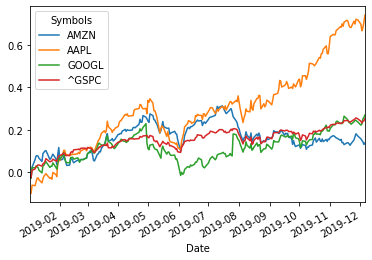

In [223]:
((1 + (df_close[df_close.columns[0:-1]])).cumprod() - 1).plot()

In [224]:
a=df['Adj Close'].pct_change()

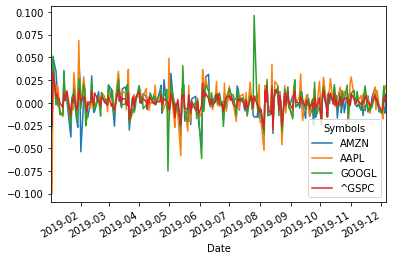

In [225]:
a.plot()

In [221]:
stock_df = df_close[df_close.columns[0:-2]]
portfolio_excess = stock_df.sum(axis=1)   #Regressing without subtracting Rf from portfolio return 

mkt_df = df_close[df_close.columns[-2:]]
mkt_df=mkt_df.diff(axis=1)*-1.0 
market_excess = mkt_df[mkt_df.columns[-1]]

model_df = pd.DataFrame(
    {'portfolio_excess': portfolio_excess,
     'market_excess': market_excess,
    })

In [222]:
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='portfolio_excess ~ market_excess', data=model_df)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['market_excess']
print(regression_beta)
CAPM_fit.summary()

0.7110644039249256
4.172527768173146


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       portfolio_excess   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     576.9
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           5.72e-65
Time:                        22:41:04   Log-Likelihood:                 570.22
No. Observations:                 235   AIC:                            -1136.
Df Residuals:                     233   BIC:                            -1130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2088      0.009     24.197      0.000       0.192       0.226
market_excess     4.1725      0.174     24.018      0.000       3.830       4.515
==============================================================================
Omnibus:                       54.953   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.879
Skew:                          -0.764   Prob(JB):                     4.62e-66
Kurtosis:                       8.329   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""